In [21]:
# importing libraries to use
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt

In [22]:
df_bikes = pd.read_csv("Trip_Data_032023.csv")

# Let's take a look at the data size we're dealing with:
print("Cyclistic's dataframe has", df_bikes.shape[0], "rows and", df_bikes.shape[1], "columns")

Cyclistic's dataframe has 258678 rows and 13 columns


In [23]:
# Taking a quick look at the first 5 rows of the dataframe:
df_bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


In [24]:
# We can also check for the type of data that there is in each column:
# df_bikes.dtypes
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258678 entries, 0 to 258677
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             258678 non-null  object 
 1   rideable_type       258678 non-null  object 
 2   started_at          258678 non-null  object 
 3   ended_at            258678 non-null  object 
 4   start_station_name  222768 non-null  object 
 5   start_station_id    222768 non-null  object 
 6   end_station_name    220240 non-null  object 
 7   end_station_id      220240 non-null  object 
 8   start_lat           258678 non-null  float64
 9   start_lng           258678 non-null  float64
 10  end_lat             258495 non-null  float64
 11  end_lng             258495 non-null  float64
 12  member_casual       258678 non-null  object 
dtypes: float64(4), object(9)
memory usage: 25.7+ MB


In [25]:
# Columns 'started at' and 'ended at' are not an object type, so, we should change that:
df_bikes['started_at'] = pd.to_datetime(df_bikes['started_at'])
df_bikes['ended_at'] = pd.to_datetime(df_bikes['ended_at'])

In [26]:
# We can now check again if it's changed or not:
df_bikes.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

The types are correct in relation to info displayed in the dataframe.

In [27]:
# We have some columns that have different types of data in it that may be worth to look at.
print("The column 'rideable_type' has", df_bikes['rideable_type'].nunique(), "different types of bikes registered, which are",
     df_bikes['rideable_type'].unique()[0], df_bikes['rideable_type'].value_counts()[0],
      df_bikes['rideable_type'].unique()[1], df_bikes['rideable_type'].value_counts()[1], "and",
       df_bikes['rideable_type'].unique()[2], df_bikes['rideable_type'].value_counts()[2] )


The column 'rideable_type' has 3 different types of bikes registered, which are electric_bike 148575 classic_bike 107083 and docked_bike 3020


In [28]:
# We can also see what types of members have been registered in this dataframe and how many for each:
print("There are", df_bikes['member_casual'].nunique(), "different types of members registered, which are",
     df_bikes['member_casual'].unique()[0], df_bikes['member_casual'].value_counts()[0], "and",
      df_bikes['member_casual'].unique()[1], df_bikes['member_casual'].value_counts()[1] )

There are 2 different types of members registered, which are member 196477 and casual 62201


In [29]:
# Let's consider now the nan values that may have been registered, first we'll check if they exist in the dataframe:
df_bikes.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    35910
start_station_id      35910
end_station_name      38438
end_station_id        38438
start_lat                 0
start_lng                 0
end_lat                 183
end_lng                 183
member_casual             0
dtype: int64

In [30]:
print("As percentages, the NaN values in the current data set would be:\n",
      (df_bikes.isna().sum()/df_bikes.count())*100)

As percentages, the NaN values in the current data set would be:
 ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    16.119910
start_station_id      16.119910
end_station_name      17.452779
end_station_id        17.452779
start_lat              0.000000
start_lng              0.000000
end_lat                0.070794
end_lng                0.070794
member_casual          0.000000
dtype: float64


We have between 0% and ~15% of NaN values in the geolocation columns. So far we've seen that according to the company's needs we're looking to have more member users rather than casual users, so it'd be good to consider how consistent the users are, through the time data. 

For this reason, we're going to be considering the time columns and disregard the geolocation ones, because at the same time, regardless of the location, the user still wants to use the service for transportation, easy-to-use, money-saving reasons.

In [31]:
# Removing al NaN columns (columns with the geolocation/location data):
df_bikes.dropna(axis=1, inplace=True) # Using dropna for those that NaNs
df_bikes.drop(columns=["ride_id", "start_lat", "start_lng"], inplace = True) # Using drop for longitude and latitude data
df_bikes.isna().sum()

rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

In [32]:
df_bikes.head(3)

,rideable_type,started_at,ended_at,member_casual
0,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,member
1,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,member
2,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,member


We can now take a deeper look into the user's preference when it comes to the type of bike and how much time they spend using the service.

In [33]:
df_bikes["time_length"]=df_bikes["ended_at"]-df_bikes["started_at"]
df_bikes

,rideable_type,started_at,ended_at,member_casual,time_length
0,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,member,0 days 00:02:18
1,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,member,0 days 00:08:25
2,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,member,0 days 00:10:38
3,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,member,0 days 00:15:43
4,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,member,0 days 00:11:00
...,...,...,...,...,...
258673,electric_bike,2023-03-08 00:00:02,2023-03-08 00:06:25,member,0 days 00:06:23
258674,classic_bike,2023-03-21 14:24:42,2023-03-21 14:50:45,member,0 days 00:26:03
258675,electric_bike,2023-03-21 16:48:52,2023-03-21 16:51:27,member,0 days 00:02:35
258676,classic_bike,2023-03-16 20:36:05,2023-03-16 20:43:11,member,0 days 00:07:06


In [34]:
df_bikes.dtypes

rideable_type             object
started_at        datetime64[ns]
ended_at          datetime64[ns]
member_casual             object
time_length      timedelta64[ns]
dtype: object

In [35]:
# Analyzing what we got above:
df_bikes["time_length"].describe()

count                       258678
mean     0 days 00:13:04.803017651
std      0 days 01:38:11.450462766
min                0 days 00:00:00
25%                0 days 00:04:26
50%                0 days 00:07:30
75%                0 days 00:12:50
max               11 days 16:08:04
Name: time_length, dtype: object

We can see a maximum of 11 days and over 16 hours and a minimum of 0 hours. The mean of the time spent by users in Cyclistic is 13 minutes.

Now that we know the time length for each ride, we're going to get these values in the same unit, this time, in minutes.

In [36]:
df_bikes["time_length (min)"]=df_bikes["time_length"].dt.total_seconds()/60
df_bikes["time_length (min)"].describe()
# Dropping the previous columns with no unit transformation:
df_bikes.drop(columns = ["time_length"], inplace=True)
# These results make all sense: ((11days*24h)+16h)*60m= ~16800 minutes

In [37]:
df_bikes.head(3)

,rideable_type,started_at,ended_at,member_casual,time_length [min]
0,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,member,2.300000
1,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,member,8.416667
2,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,member,10.633333


Let's take a look at the plot and what's the behaviour between features. 

Recall that we have categorical values, that is, columns that have classifications as object type (rideable_type, member_casual).
For these type of columns we may want to use One Hot Encoding or dummies.

<BarContainer object of 258678 artists>

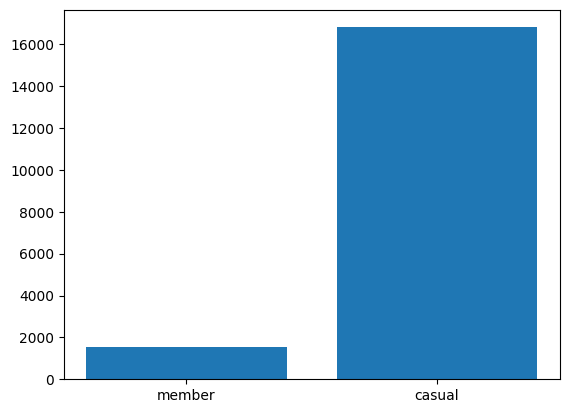

In [42]:
plt.bar(x=df_bikes["member_casual"], height=df_bikes["time_length [min]"])

In [43]:
plt.bar(x=df_bikes["rideable_type"], height=df_bikes["time_length [min]"])